In [7]:
!pip install diffusers==0.31.0

     |████████████████████████████████| 2.9 MB 4.2 MB/s            
     |████████████████████████████████| 464 kB 68.2 MB/s            
     |████████████████████████████████| 461 kB 85.7 MB/s            
     |████████████████████████████████| 184 kB 74.2 MB/s            
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2021.11.1
    Uninstalling fsspec-2021.11.1:
      Successfully uninstalled fsspec-2021.11.1
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.15.1
    Uninstalling huggingface-hub-0.15.1:
      Successfully uninstalled huggingface-hub-0.15.1


In [8]:
import diffusers
print(diffusers.__version__)

0.31.0


/opt/conda/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so
/opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 117
CUDA SETUP: Loading binary /opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so...


/opt/conda/lib/python3.9/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "
/opt/conda/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib')}
  warn(msg)
/opt/conda/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/opt/conda/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//10.88.0.1'

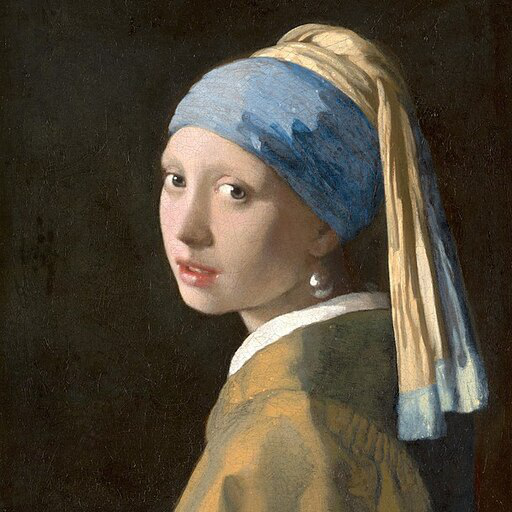

In [2]:
import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image 

# 이미지 불러오기
image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

image

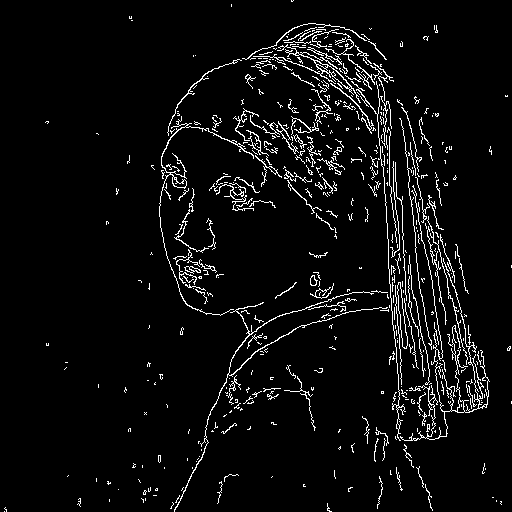

In [3]:
import cv2
from PIL import Image 
import numpy as np

# 이미지를 NumPy 배열로 변환합니다. 
image = np.array(image)

# threshold를 지정합니다. 
low_threshold = 100
high_threshold = 200

# 윤곽선을 검출합니다. 
image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)  # NumPy 배열을 PIL 이미지로 변환합니다. 

canny_image

In [4]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

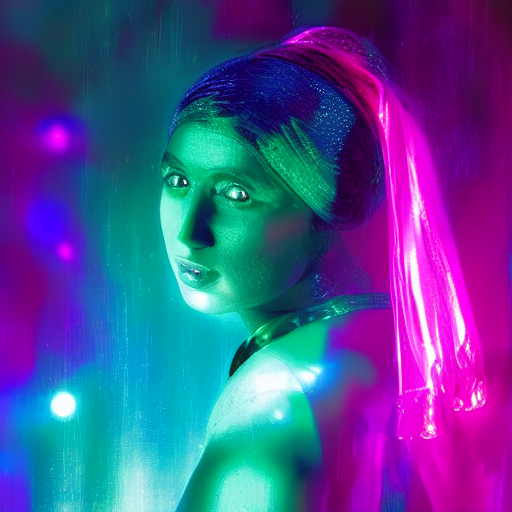

In [5]:
from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다. 
generator = torch.manual_seed(0)  

# 이미지를 생성합니다. 
canny_image = canny_pipe(
    prompt="disco dancer with colorful lights", 
    num_inference_steps=20, 
    generator=generator, 
    image=canny_image
).images[0]

# 생성된 이미지를 저장합니다. 
canny_image.save("/aiffel/aiffel/canny_image.png")  

# 생성된 이미지를 출력합니다. 
canny_image

  0%|          | 0/30 [00:00<?, ?it/s]

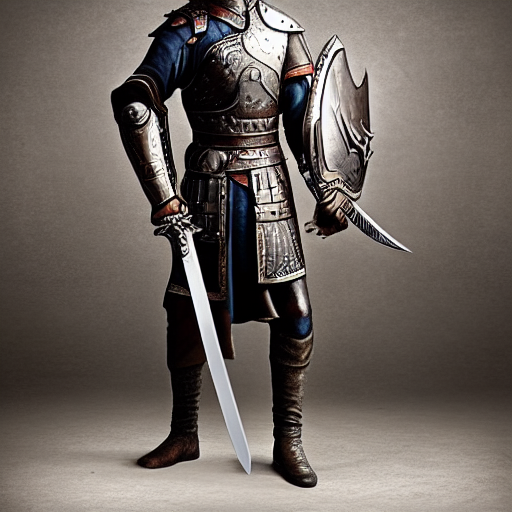

In [7]:
from diffusers import UniPCMultistepScheduler
import torch

# Scheduler 설정
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 랜덤 시드 고정
generator = torch.manual_seed(42)

# 프롬프트와 부정적인 프롬프트 설정
prompt = "Full body view of a hero holding a legendary sword and shield"
negative_prompt = "fatness"

# 하이퍼파라미터 조정하여 이미지 생성
canny_image = canny_pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=30,
    guidance_scale=8.0,
    controlnet_conditioning_scale=1.2,
    generator=generator,
    image=canny_image
).images[0]

# 생성된 이미지를 저장 및 출력
canny_image.save("/aiffel/aiffel/hero.png")
canny_image


In [ ]:
# 인체 자세 감지

In [14]:
# controlnet-aux를 설치합니다. Human pose를 검출해주는 controlnet의 보조용 모델입니다.
!pip install controlnet-aux==0.0.1

     |████████████████████████████████| 64 kB 3.3 MB/s            


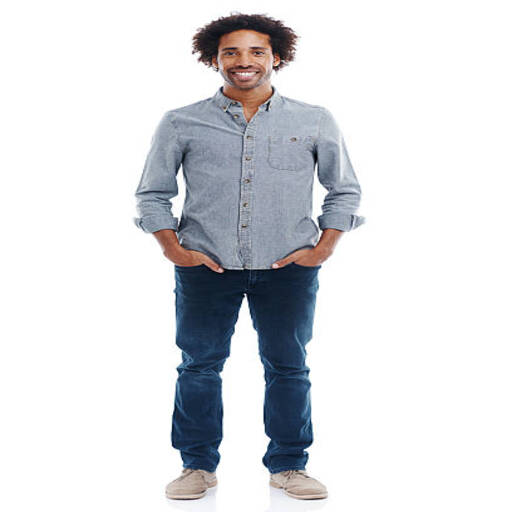

In [9]:
from diffusers.utils import load_image

openpose_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png"
)
openpose_image

cuda


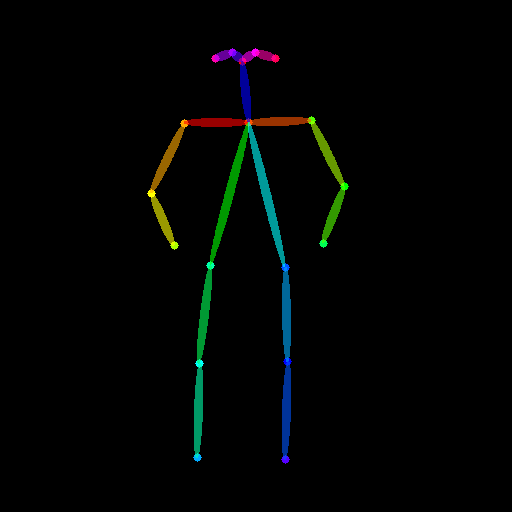

In [10]:
from controlnet_aux import OpenposeDetector

# 인체의 자세를 검출하는 사전 학습된 ControlNet 불러오기
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# 이미지에서 자세 검출
openpose_image = openpose(openpose_image)
openpose_image

In [11]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel 

openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
openpose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=openpose_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

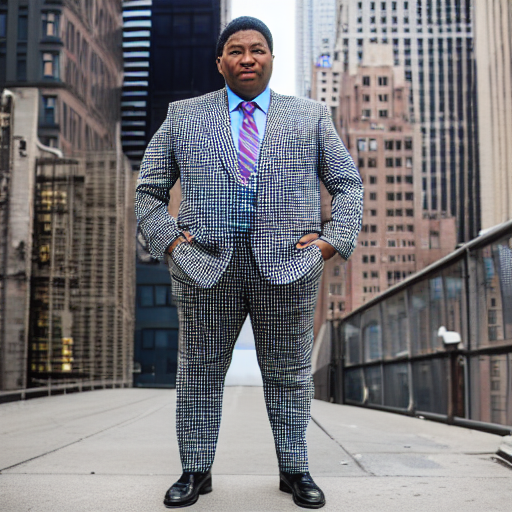

In [14]:
from diffusers import UniPCMultistepScheduler

openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)
openpose_pipe = openpose_pipe.to("cuda")

# Q. 코드를 작성해 보세요.
# 동일한 이미지를 생성하기 위해 seed를 넣어줍니다. 
generator = torch.manual_seed(42) # [[YOUR CODE]]

#프롬프트를 작성합니다. 
prompt =  "a person standing in a newyork city, wearing a high-tech suit" # [[YOUR CODE]]
negative_prompt =  "blurry, low quality, unrealistic" # [[YOUR CODE]]

images = openpose_image

# 이미지를 생성합니다. 
openpose_image1 = openpose_pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=openpose_image,
    num_inference_steps=50,
    generator=generator
).images[0]

# 생성된 이미지를 출력합니다. 
openpose_image1

  0%|          | 0/75 [00:00<?, ?it/s]

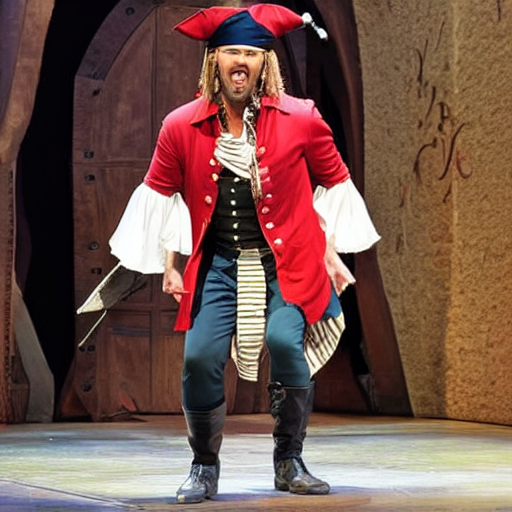

In [17]:
# 프롬프트와 하이퍼파라미터 조정
prompt = "a pirate performing on a theater stage"
negative_prompt = "dark, blurry, low detail"
num_inference_steps = 75
guidance_scale = 7.5

# 이미지 생성
openpose_image2 = openpose_pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=openpose_image,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    generator=generator
).images[0]

openpose_image2


In [ ]:
# 메모리 삭제
# torch.cuda.empty_cache()

In [1]:
!pip install -q diffusers==0.31.0

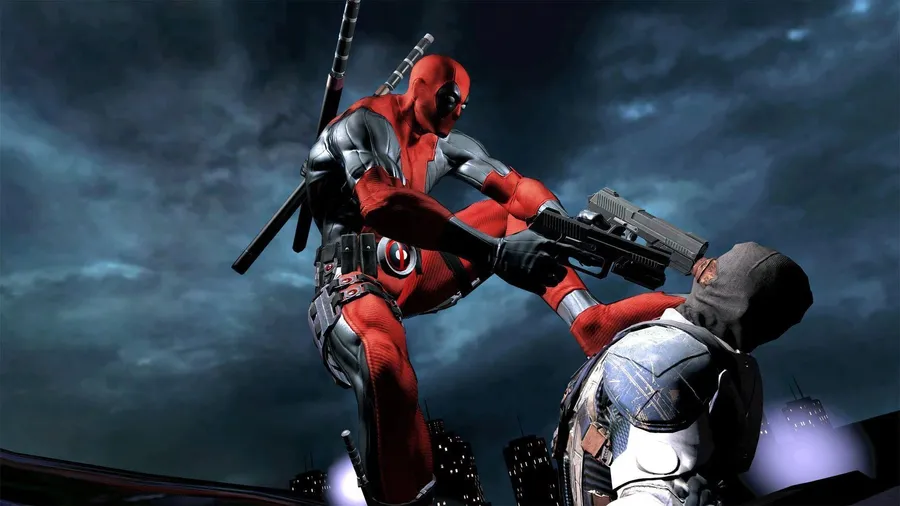

In [2]:
from PIL import Image
canny_image = Image.open("a.jpg")
canny_image

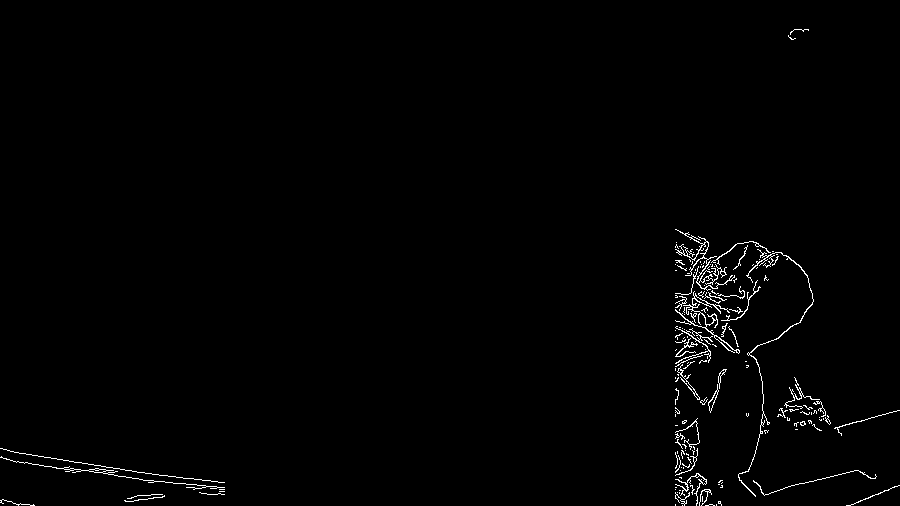

In [3]:
from diffusers.utils import load_image 
from PIL import Image
import cv2
import numpy as np

# 이미지를 불러오세요. 
canny_image = np.array(canny_image)  # PIL 이미지를 NumPy 배열로 변환합니다.

# threshhold를 지정합니다. 
low_threshold = 50  # 낮은 임계값
high_threshold = 150  # 높은 임계값

# 이미지를 NumPy 배열로 변환합니다. 
gray_image = cv2.cvtColor(canny_image, cv2.COLOR_RGB2GRAY)  # 그레이스케일 변환
canny_image = cv2.Canny(gray_image, low_threshold, high_threshold)  # Canny 알고리즘 적용

# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다. 
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

# 윤곽선을 검출하고 NumPy 배열을 PIL 이미지로 변환합니다. 
canny_image = Image.fromarray(canny_image)  # NumPy 배열을 PIL 이미지로 변환

# 결과를 출력하거나 저장합니다.
canny_image.show()  # 결과 이미지를 보여줍니다.
# canny_image.save("output_path.jpg")  # 결과 이미지를 저장하려면 사용


In [4]:
# controlnet-aux를 설치합니다. Human pose를 검출해주는 controlnet의 보조용 모델입니다.
!pip install -q controlnet-aux==0.0.1

cuda


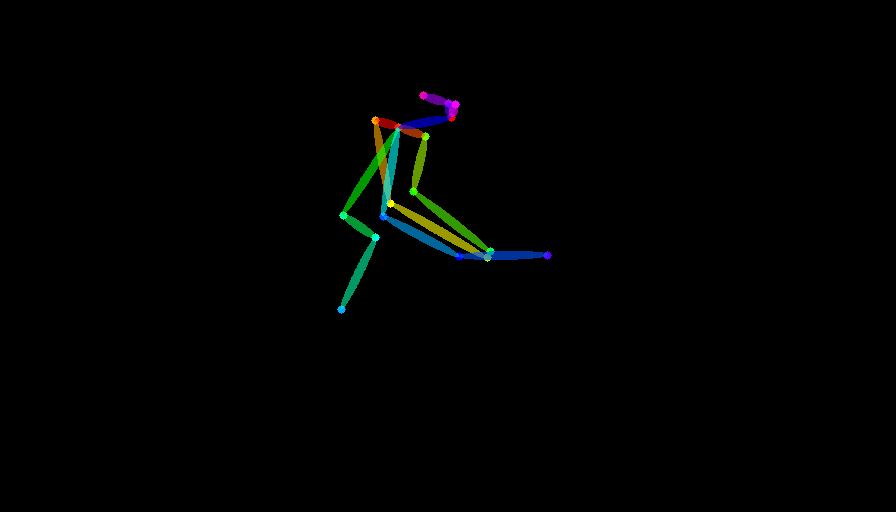

In [5]:
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image

openpose_image = Image.open("a.jpg")

# OpenposeDetector를 사용하여 인체 자세를 검출합니다.
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
openpose_image = openpose(openpose_image)

openpose_image


Original size: 896x512
Original size: 896x512


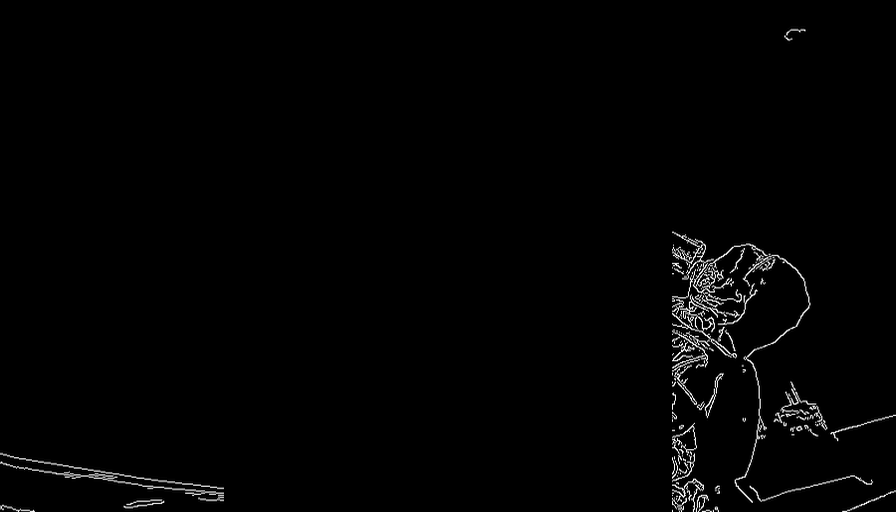

In [12]:
# 입력 이미지를 64의 배수로 리사이즈하는 함수
def resize_to_64_multiple(image, target_size=None):
    width, height = image.size
    print(f"Original size: {width}x{height}")  # 이미지 크기 출력

    if target_size:
        new_width, new_height = target_size  # 타겟 사이즈로 강제 리사이즈
    else:
        new_width = max((width // 64) * 64, 64)  # 최소 크기 64로 설정
        new_height = max((height // 64) * 64, 64)  # 최소 크기 64로 설정

    return image.resize((new_width, new_height), resample=Image.LANCZOS)


# 두 이미지를 동일한 크기로 리사이즈 (수정된 부분)
# 최대 너비와 높이를 계산하고 이를 64의 배수로 조정
max_width = max(openpose_image.size[0], canny_image.size[0])
max_height = max(openpose_image.size[1], canny_image.size[1])

# 최대 너비와 높이를 각각 64의 배수로 맞춤
target_width = (max_width + 63) // 64 * 64
target_height = (max_height + 63) // 64 * 64
target_size = (target_width, target_height)

openpose_image = resize_to_64_multiple(openpose_image, target_size)
canny_image = resize_to_64_multiple(canny_image, target_size)





In [1]:
# 입력 이미지를 64의 배수로 리사이즈하는 함수
def resize_to_64_multiple(image, target_size=None):
    width, height = image.size
    print(f"Original size: {width}x{height}")  # 이미지 크기 출력

    if target_size:
        new_width, new_height = target_size  # 타겟 사이즈로 강제 리사이즈
    else:
        new_width = max((width // 64) * 64, 64)  # 최소 크기 64로 설정
        new_height = max((height // 64) * 64, 64)  # 최소 크기 64로 설정

    return image.resize((new_width, new_height), resample=Image.LANCZOS)


# 두 이미지를 동일한 크기로 리사이즈 (수정된 부분)
# 목표 크기를 강제로 약 200x200으로 설정
target_size = (192, 192)  # 강제 리사이즈 크기 (192는 64의 배수)

openpose_image = resize_to_64_multiple(openpose_image, target_size)
canny_image = resize_to_64_multiple(canny_image, target_size)

NameError: name 'openpose_image' is not defined

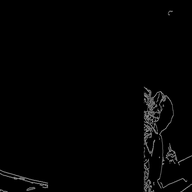

In [27]:

canny_image

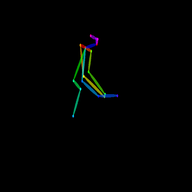

In [28]:
openpose_image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

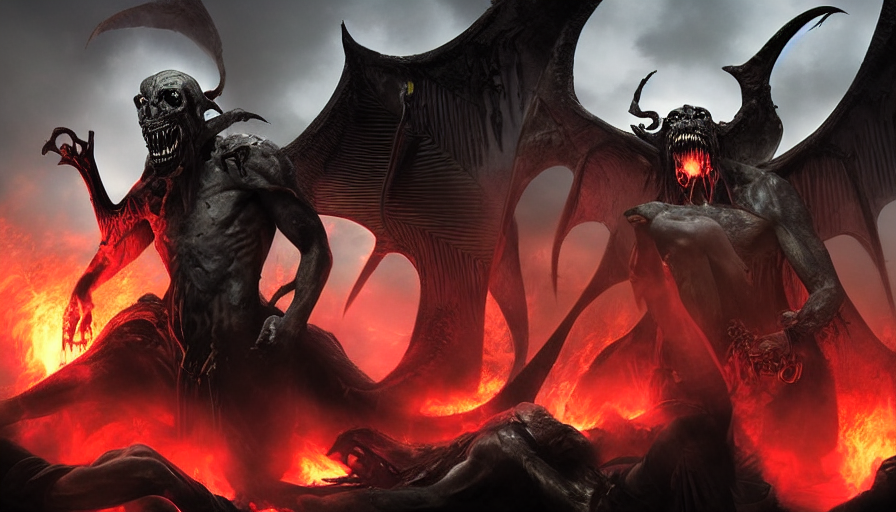

In [14]:
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler

import numpy as np


# Edge Detection과 Openpose, 2개의 전처리기를 controlnets라는 리스트로 만듭니다.
controlnet_edge = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
controlnet_pose = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
controlnets = [controlnet_edge, controlnet_pose]

# 리스트 controlnets를 파이프라인으로 전달합니다.
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", 
    controlnet=controlnets, 
    torch_dtype=torch.float16  # FP16으로 메모리 사용량 감소
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# 프롬프트를 작성합니다.
prompt = "arch demon"
negative_prompt = "small"

# seed를 지정합니다.
generator = torch.manual_seed(42)

# 이미지를 생성합니다.
images = [openpose_image, canny_image]

# torch.no_grad()로 메모리 사용량 감소
with torch.no_grad():
    image = pipe(prompt=prompt, negative_prompt=negative_prompt, image=images, generator=generator).images[0]

# 생성된 이미지를 저장합니다.
image.save("output2.png")

# 생성된 이미지를 출력합니다.
image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

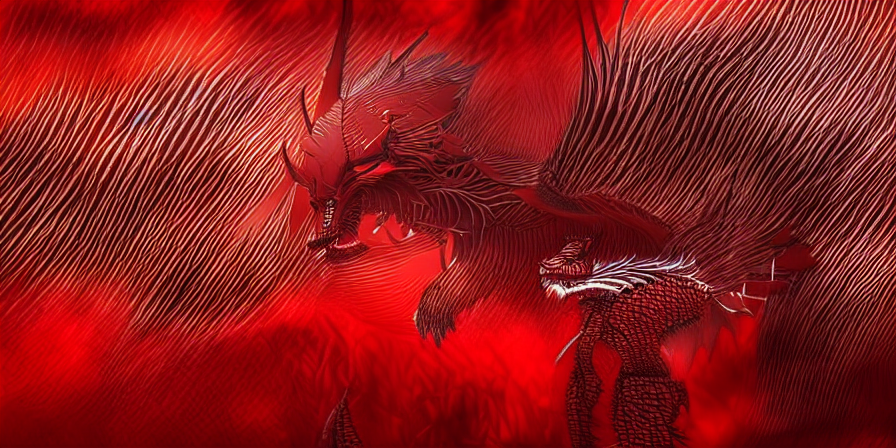

In [9]:
# 새로운 프롬프트 작성
prompt = "red dragon * 100"  # 원하는 새로운 프롬프트
negative_prompt = "fat"

# torch.no_grad()로 메모리 사용량 감소
with torch.no_grad():
    image = pipe(prompt=prompt, negative_prompt=negative_prompt, image=images, generator=generator).images[0]

# 생성된 이미지를 저장합니다.
image.save("output3.png")

# 생성된 이미지를 출력합니다.
image.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

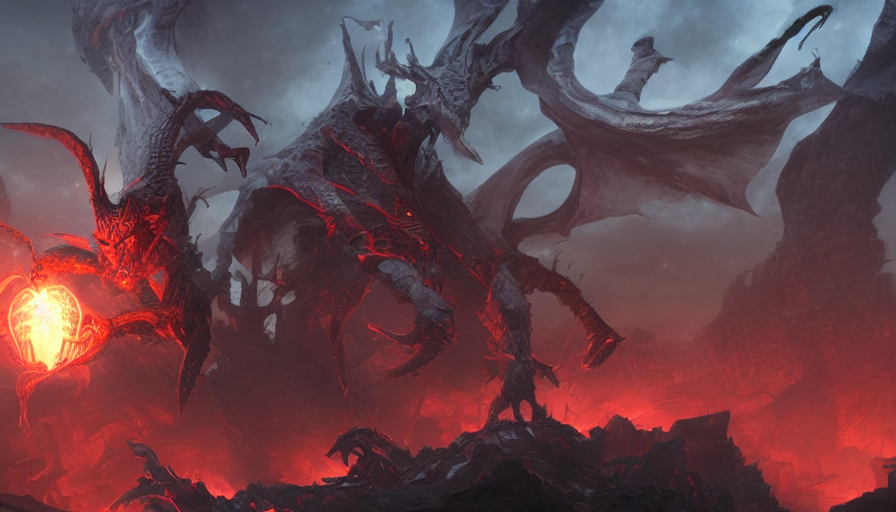

In [20]:
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler

# ControlNet 모델 로드 (Openpose만 사용)
controlnet_pose = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)

# Stable Diffusion 파이프라인 생성
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet_pose,
    torch_dtype=torch.float16  # FP16으로 메모리 절약
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# 프롬프트 작성
prompt = "arch demon"
negative_prompt = "small"

# seed 설정
generator = torch.manual_seed(42)

# 이미 OpenposeDetector로 생성된 인체 자세 데이터를 사용
# openpose_image는 이미 인체 자세가 추출된 이미지임
images = openpose_image

# torch.no_grad()로 메모리 사용량 감소
with torch.no_grad():
    image = pipe(prompt=prompt, negative_prompt=negative_prompt, image=images, generator=generator).images[0]

# 결과 이미지 저장 및 출력
image.save("output3.png")
image.show()


In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

# Edge Detection과 OpenPose, 2개의 ControlNet 모델 로드
controlnets = [
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16),
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
]

# Stable Diffusion 파이프라인 생성
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnets,
    torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# 프롬프트 작성
prompt = "arch demon"
negative_prompt = "small"

# seed 설정
generator = torch.manual_seed(42)

# 이미 전처리된 openpose_image와 canny_image를 사용
images = [canny_image, openpose_image]  # ControlNet 순서대로 리스트로 전달

# torch.no_grad()로 메모리 사용량 감소
with torch.no_grad():
    image = pipe(prompt=prompt, negative_prompt=negative_prompt, image=images, generator=generator).images[0]

# 결과 이미지 저장 및 출력
image.save("controlnet_output.png")
image.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

In [2]:
# gpu 메모리 부족하다하고, 이미지 사이즈 줄였는데도 커널 다운 되고 